<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
!cwd

/bin/bash: cwd: command not found


In [3]:
os.chdir('/content/drive/MyDrive')



In [4]:
df = pd.read_csv('./mouse_viral_study.csv')
df.head(5)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


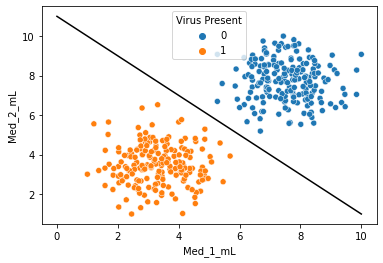

In [5]:
sns.scatterplot(x='Med_1_mL', y= 'Med_2_mL', hue='Virus Present', data= df)

# hyperplane
x = np.linspace(0,10,100)
m=-1
b=11
y =m*x+b

plt.plot(x,y, color='black')

In [6]:
from sklearn.svm import SVC

In [7]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [8]:
model = SVC(kernel= 'linear', C=1000)

In [9]:
model.fit(X,y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
from svm_margin_plot import plot_svm_boundary

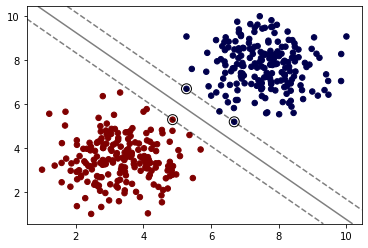

In [11]:
plot_svm_boundary(model, X,y)

In [12]:
model1 = SVC(kernel= 'linear', C=0.05)
model1.fit(X,y)

SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

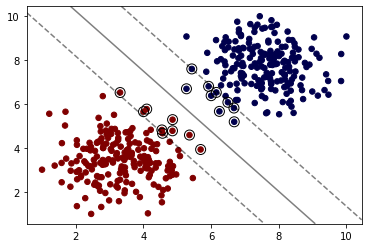

In [13]:
plot_svm_boundary(model1, X,y)

In [14]:
model2 = SVC(kernel= 'rbf', C=1, gamma='auto')
model2.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

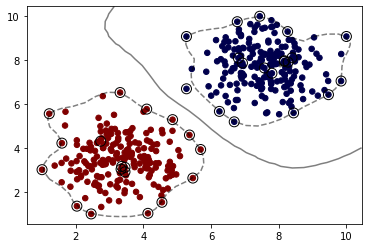

In [15]:
plot_svm_boundary(model2, X,y)

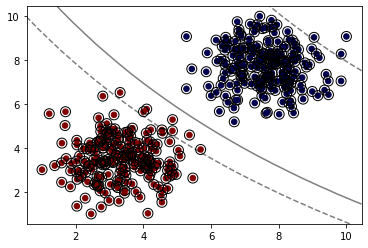

In [16]:
model3 = SVC(kernel= 'sigmoid', C=1)
model3.fit(X,y)
plot_svm_boundary(model3, X,y)

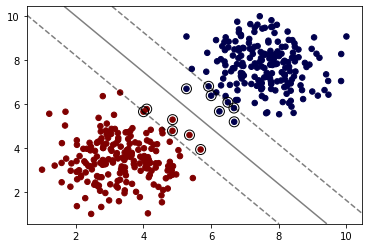

In [17]:
model4 = SVC(kernel= 'poly', C=1, degree=1)
model4.fit(X,y)
plot_svm_boundary(model4, X,y)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
svm = SVC()
param_grid = {'C':[0.01, 0.1,1], 'kernel':['linear','rbf']}


In [20]:
grid = GridSearchCV(svm, param_grid)

In [21]:
grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [28]:
df = pd.read_csv('./cement_slump.csv')
df.tail()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17
102,348.7,0.1,223.1,208.5,9.6,786.2,758.1,29.0,78.0,48.70


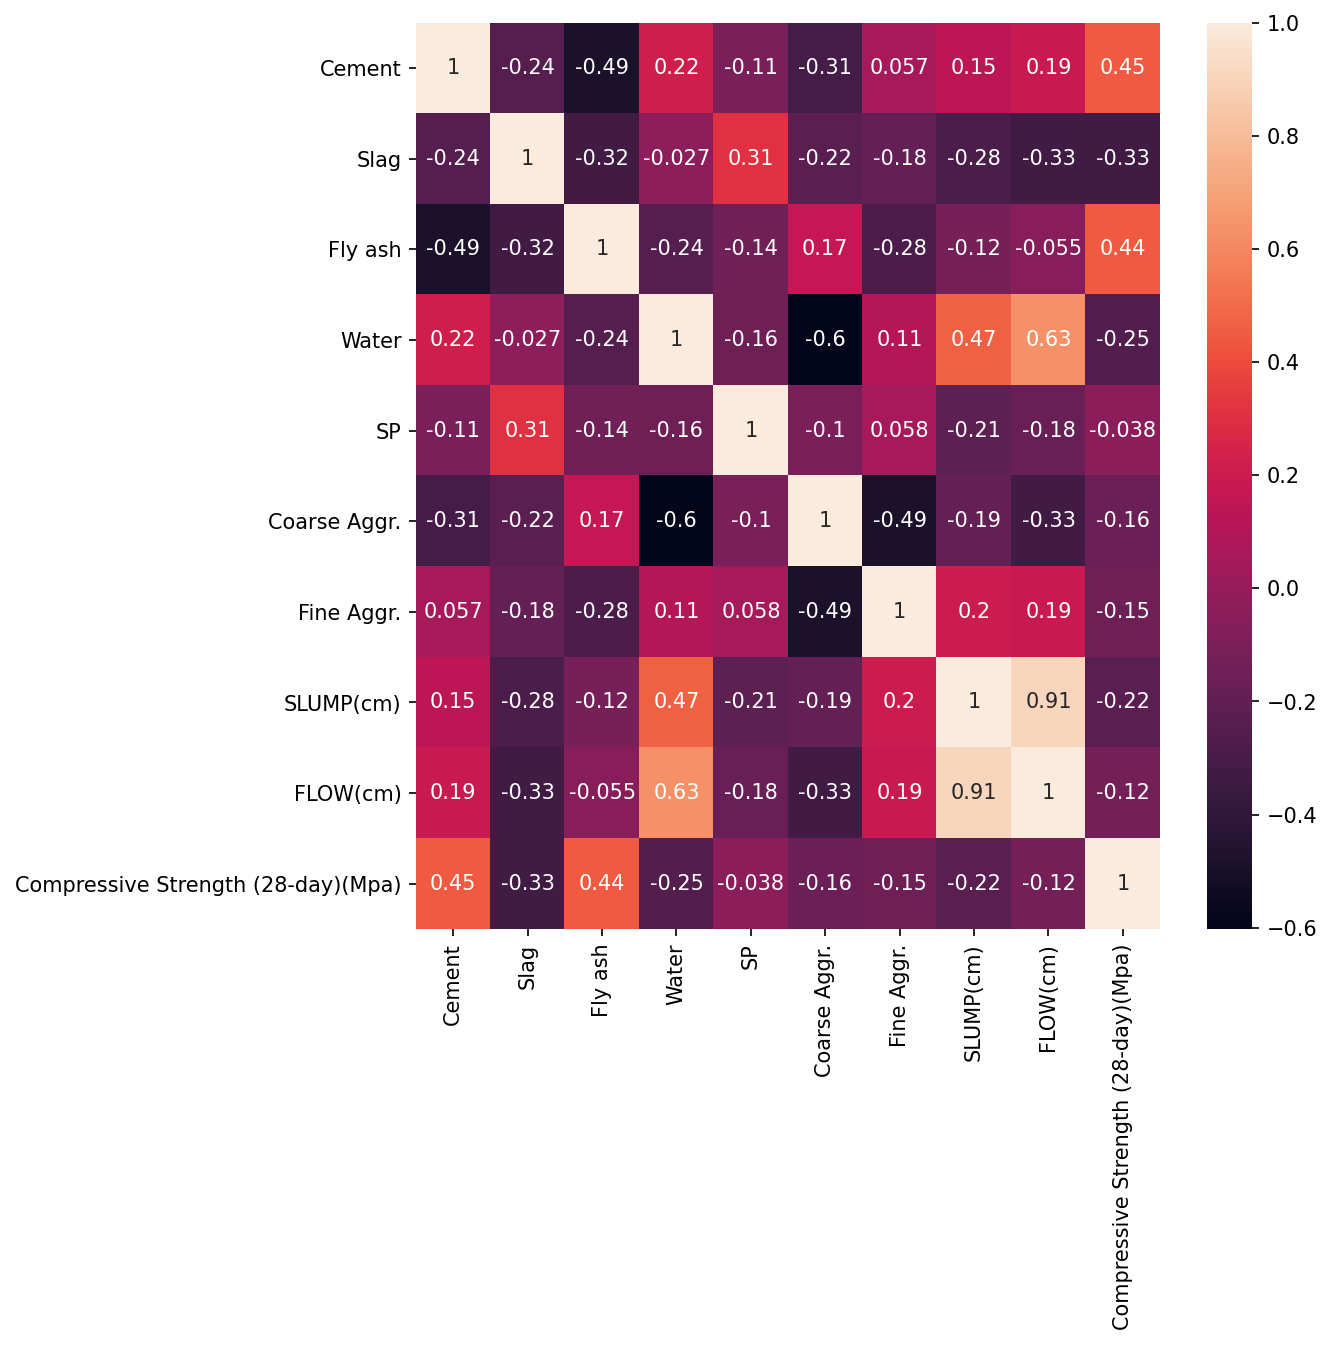

In [30]:
plt.figure(figsize=(8,8), dpi =150)
sns.heatmap(df.corr(), annot= True)

In [46]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [47]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 101)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
scaled_X_train = scaler.fit_transform(X_train)


In [72]:
scaled_X_test = scaler.transform(X_test)

In [73]:
from sklearn.svm import SVR, LinearSVR

In [74]:
base_model = SVR()

In [75]:
base_model.fit(scaled_X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
base_predict= base_model.predict(scaled_X_test)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mean_absolute_error(y_test, base_predict)

5.236902091259178

In [86]:
np.sqrt(mean_squared_error(y_test, base_predict))

6.695914838327133

In [89]:
param_grid = {'C':[0.001, 0.01,0.1,0.5,1], 'kernel':['linear', 'rbf', 'poly'], 'gamma':['scale','auto'],
              'degree':[2,3,4], 'epsilon':[0, 0.001,0.1,0.5,1,2,]}

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
svr = SVR()

In [92]:
grid =GridSearchCV(svr, param_grid)

In [93]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.001, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [95]:
grid_predict = grid.predict(scaled_X_test)

In [97]:
mean_absolute_error(y_test, grid_predict)

2.5128012210762365

In [99]:
np.sqrt(mean_squared_error(y_test, grid_predict))

3.178210305119858